In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("./R03_75")


In [3]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [5]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [6]:
data = dataset

In [7]:
data.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns={"label"})
Y = data['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [9]:
train_accuracies = []

In [10]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
epochs = 100
for epoch in range(epochs):
    print(f"epoch {epoch+1}/100")
    history = model.fit(X_train_reshaped, Y_train, epochs=1)  
    train_accuracies.append(history.history['acc'][0])



epoch 1/100
Train on 1183321 samples
1183321/1183321 [==============================] - 129s 109us/sample - loss: 0.9741 - acc: 0.5321
epoch 2/100
Train on 1183321 samples
1183321/1183321 [==============================] - 126s 107us/sample - loss: 0.8830 - acc: 0.5834
epoch 3/100
Train on 1183321 samples
1183321/1183321 [==============================] - 126s 106us/sample - loss: 0.8313 - acc: 0.6127
epoch 4/100
Train on 1183321 samples
1183321/1183321 [==============================] - 129s 109us/sample - loss: 0.7987 - acc: 0.6311
epoch 5/100
Train on 1183321 samples
1183321/1183321 [==============================] - 129s 109us/sample - loss: 0.7769 - acc: 0.6430
epoch 6/100
Train on 1183321 samples
1183321/1183321 [==============================] - 125s 105us/sample - loss: 0.7607 - acc: 0.6517
epoch 7/100
Train on 1183321 samples
1183321/1183321 [==============================] - 125s 106us/sample - loss: 0.7471 - acc: 0.6591
epoch 8/100
Train on 1183321 samples
1183321/1183321 [=

In [13]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.6862
Test Accuracy: 0.7045


In [14]:
print(train_accuracies)

[0.53208977, 0.5833827, 0.61265796, 0.63111365, 0.64297855, 0.6517429, 0.65912884, 0.66563004, 0.6708374, 0.6749859, 0.67840594, 0.68152344, 0.6840697, 0.68626094, 0.68806857, 0.69005364, 0.6913399, 0.6934027, 0.6944963, 0.6956675, 0.6970408, 0.6984791, 0.69981515, 0.70051324, 0.7009019, 0.70203096, 0.7031338, 0.7036223, 0.70458394, 0.7053116, 0.70580935, 0.70634425, 0.70704734, 0.7080877, 0.7080724, 0.70844346, 0.7090857, 0.70952004, 0.71011585, 0.71072936, 0.71103275, 0.71152294, 0.7119607, 0.7121229, 0.71267647, 0.7132815, 0.7135173, 0.7135562, 0.71380717, 0.7143784, 0.71474856, 0.7146945, 0.71554124, 0.7157331, 0.7158066, 0.71589875, 0.7164514, 0.716781, 0.71649283, 0.717114, 0.7171486, 0.7173979, 0.71750605, 0.7179793, 0.7177123, 0.718161, 0.71806043, 0.71848553, 0.7182244, 0.71936524, 0.71909904, 0.71937114, 0.7191371, 0.7193264, 0.7197168, 0.7197827, 0.72046214, 0.71997625, 0.7201664, 0.72011906, 0.72052807, 0.72021455, 0.7205399, 0.72095907, 0.721385, 0.7210402, 0.7208551, 0.72

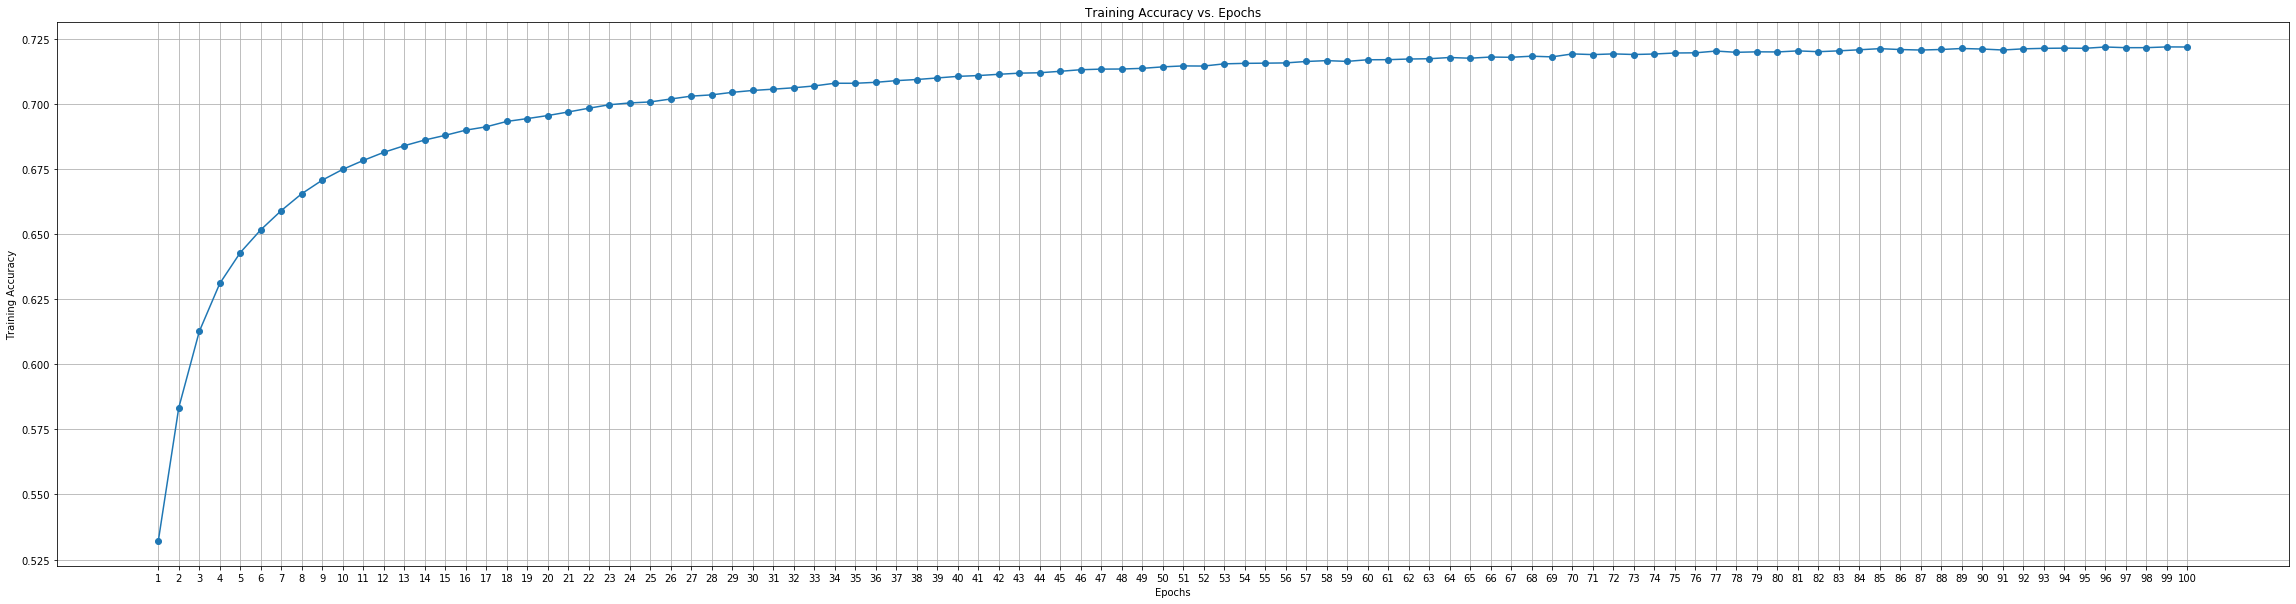

In [15]:
epochs_list = [i for i in range(1,epochs+1)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1, 101))

plt.show()